In [6]:
!pip install -r requirements.txt

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached notebook-7.4.5-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached jupyterlab-4.4.7-py3-none-any.whl.metadata (16 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.3.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.17.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.27.3-

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [12]:
# descompactando os dados pre processados 
import zipfile
zip_path = "../FACESENSE/data/processed_data.zip"
extract_path = "../FACESENSE/data/processed_data"

In [13]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [42]:
# Carregando os dados pré-processados
X_train = np.load("../FACESENSE/data/processed_data/processed_data/X_train.npy")
y_train = np.load("../FACESENSE/data/processed_data/processed_data/y_train.npy")
X_val = np.load("../FACESENSE/data/processed_data/processed_data/X_val.npy")
y_val = np.load("../FACESENSE/data/processed_data/processed_data/y_val.npy")
X_test = np.load("../FACESENSE/data/processed_data/processed_data/X_test.npy")
y_test = np.load("../FACESENSE/data/processed_data/processed_data/y_test.npy")

In [ ]:
# Passo 1: Carregue os dados pré-processados da Aléxia
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from collections import Counter

# Ajuste o caminho se necessário.
processed_data_path = "..\FACESENSE\data\processed_data\processed_data"

X_train = np.load(os.path.join(processed_data_path, "X_train.npy"))
y_train = np.load(os.path.join(processed_data_path, "y_train.npy"))
X_val = np.load(os.path.join(processed_data_path, "X_val.npy"))
y_val = np.load(os.path.join(processed_data_path, "y_val.npy"))
X_test = np.load(os.path.join(processed_data_path, "X_test.npy"))
y_test = np.load(os.path.join(processed_data_path, "y_test.npy"))

print("Shapes originais:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Passo 2: Remaapeamento de rótulos
# Identifique todos os rótulos únicos em todos os conjuntos de dados.
all_y = np.concatenate([y_train, y_val, y_test])
unique_labels = sorted(np.unique(all_y))

# Crie um dicionário para mapear os rótulos antigos para os novos (0, 1, 2, ...).
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
num_classes = len(unique_labels)

print("\n--- Processamento de Rótulos ---")
print(f"Rótulos originais encontrados: {unique_labels}")
print(f"Mapeamento de rótulos: {label_mapping}")
print(f"Novo número de classes: {num_classes}")

# Aplique o mapeamento nos seus dados.
y_train_remapped = np.array([label_mapping[label] for label in y_train])
y_val_remapped = np.array([label_mapping[label] for label in y_val])
y_test_remapped = np.array([label_mapping[label] for label in y_test])

# Verifique se o remapeamento funcionou.
print(f"Rótulos remapeados no conjunto de treino: {np.unique(y_train_remapped)}")

# Passo 3: One-Hot Encoding
# Converta os rótulos remapeados para o formato one-hot.
y_train_one_hot = to_categorical(y_train_remapped, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_remapped, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_remapped, num_classes=num_classes)

print("\n--- One-Hot Encoding ---")
print(f"Novo shape de y_train_one_hot: {y_train_one_hot.shape}")
print(f"Novo shape de y_val_one_hot: {y_val_one_hot.shape}")
print(f"Novo shape de y_test_one_hot: {y_test_one_hot.shape}")


Shapes originais:
X_train: (246, 300, 411), y_train: (246,)
X_val: (49, 300, 411), y_val: (49,)
X_test: (49, 300, 411), y_test: (49,)

--- Processamento de Rótulos ---
Rótulos originais encontrados: [np.int64(1), np.int64(3), np.int64(7), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(16), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(25), np.int64(27), np.int64(28), np.int64(30), np.int64(31)]
Mapeamento de rótulos: {np.int64(1): 0, np.int64(3): 1, np.int64(7): 2, np.int64(10): 3, np.int64(11): 4, np.int64(12): 5, np.int64(13): 6, np.int64(16): 7, np.int64(19): 8, np.int64(20): 9, np.int64(21): 10, np.int64(22): 11, np.int64(23): 12, np.int64(25): 13, np.int64(27): 14, np.int64(28): 15, np.int64(30): 16, np.int64(31): 17}
Novo número de classes: 18
Rótulos remapeados no conjunto de treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]

--- One-Hot Encoding ---
Novo shape de y_train_one_hot: (246, 18)
Novo shape de y_val_one_

In [57]:

# O shape de entrada para o modelo LSTM. 
# É o shape de uma única amostra de X_train (frames, features)
input_shape = (X_train.shape[1], X_train.shape[2])

# Construa o modelo
model = Sequential()

# Adicione a camada LSTM para processar as sequências.
model.add(LSTM(64, input_shape=input_shape))

# Adicione uma camada de Dropout para ajudar a evitar o overfitting.
model.add(Dropout(0.5))

# Adicione a camada de saída. O número de neurônios deve ser igual ao número de classes.
model.add(Dense(num_classes, activation='softmax'))

# Exiba um resumo da arquitetura do seu modelo.
model.summary()

c:\Users\mitie\miniconda3\envs\lstm\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │       121,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,026 (480.57 KB)

 Trainable params: 123,026 (480.57 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Compile o modelo.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [59]:

# Treine o modelo usando os dados processados.
history = model.fit(
    X_train, y_train_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_one_hot)
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.0335 - loss: 3.1468 - val_accuracy: 0.1020 - val_loss: 2.8161
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.0489 - loss: 2.8801 - val_accuracy: 0.1429 - val_loss: 2.6751
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.1545 - loss: 2.7544 - val_accuracy: 0.2857 - val_loss: 2.5698
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.1827 - loss: 2.6784 - val_accuracy: 0.2245 - val_loss: 2.5234
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.1792 - loss: 2.5440 - val_accuracy: 0.3265 - val_loss: 2.3986
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.1569 - loss: 2.6093 - val_accuracy: 0.2449 - val_loss: 2.3415
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.1799 - loss: 2.4811 - val_accuracy: 0.3265 - val_loss: 2.2602
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.2538 - loss: 2.4109 - val_accuracy: 0.3061 - val_loss:

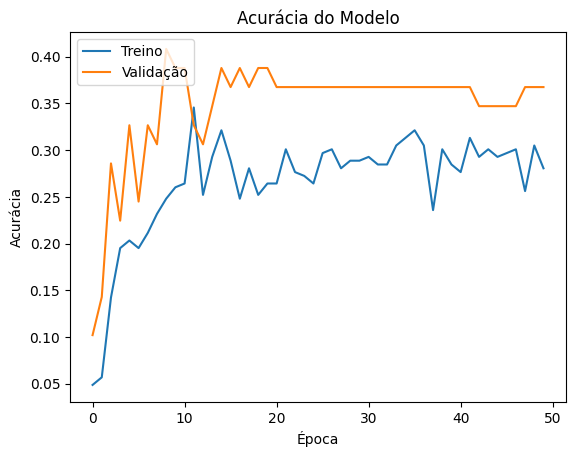

In [60]:
# Gráfico de Acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

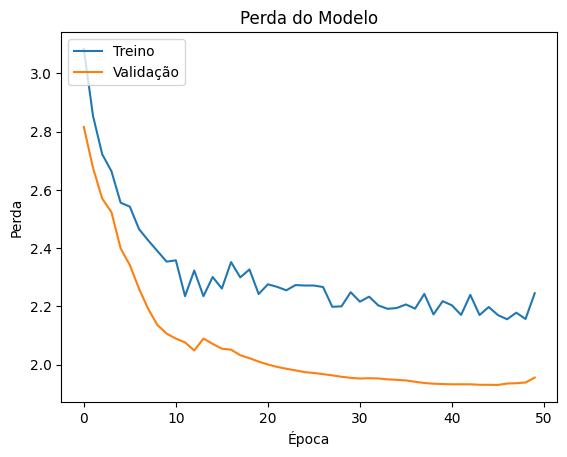

In [61]:
# Gráfico de Perda (Loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()